# Creating Sliders in Jupyter Notebooks

This notebook illustrates how to create sliders using `ipywidgets` for interactive plots.

### Credits:
Some materials developed in this notebook were inspired by https://github.com/jckantor/CBE30338

# 1. Simple Slider

We'll start by creating a plot to visualize the step response of a transfer function. We'll use an ipywidgets slider to manipulate process parameters and see how the response changes with $K_p$ and $\tau_I$.

In [7]:
# Import the libraries we'll need
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',} # svg makes the figures look nicer
import matplotlib.pyplot as plt
import numpy as np
import control
import warnings
warnings.filterwarnings('ignore') #suppress all warnings

In [8]:
# Define the transfer function
def tf(K_p, tau_I, print_variables=False):
    G   = control.tf([1],[1,0])  # Transfer function for the process
    G_c = K_p*control.tf([tau_I,1],[tau_I*1,0]) # Transfer function for the controller
    sys = G_c*G/(1+G_c*G) # The closed loop transfer function
    if print_variables:
        print('Process TF: ', G)
        print('Controller TF: ', G_c)
        print('Closed-Loop TF: ', sys)
    return sys, T

Process TF:  
1
-
s

Controller TF:  
s + 1
-----
  s

Closed-Loop TF:  
   s^3 + s^2
---------------
s^4 + s^3 + s^2



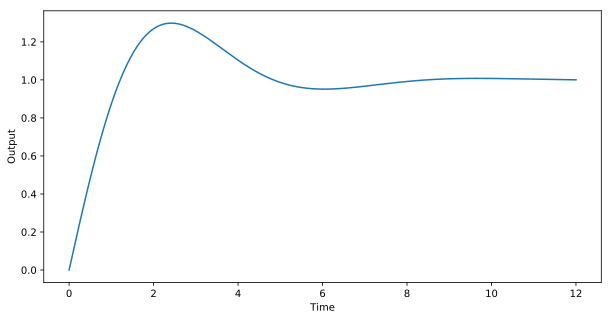

In [9]:
# Define our TF parameters 
K_p = 1
tau_I = 1
T = np.linspace(0,12,1000) # Time scale of the process, we'll use 12 seconds
sys, T = tf(1,1,print_variables=True)

# Generate a step response
t, u = control.step_response(sys,T=T)

# Plot
plt.figure(1, figsize=(10,5))
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,u)
plt.show()

Looks good, now let's make the plot interactive using the slider. We'll first need to import some libraries from ipywidgets.

In [10]:
# Libraries you need for a simple slider
from ipywidgets import interactive
from ipywidgets import Button
from IPython.display import display
import warnings
warnings.filterwarnings('ignore') #suppress all warnings

Now we need to define a function that we want to manipulate with our sliders. In our case, we want to manipulate the plot with 2 handles, $K_p$ and $\tau_I$.

In [11]:
def interactive_function(K_p, tau_I):
    # The transfer function we defined earlier
    sys, T = tf(K_p, tau_I)
    
    # Generate step response, step_response returns 2 values: t (time) and u (output)
    t, u = control.step_response(sys,T=T)
    
    # Plotting
    plt.figure(1, figsize=(10,5))
    plt.xlabel('Time')
    plt.ylabel('Output')
    plt.plot(t,u)
    plt.show()

# ipywidgets to create sliders 
interactive_plot = interactive(interactive_function, K_p=(0.1, 5), tau_I=(0.05,10))
output = interactive_plot.children[-1]
interactive_plot